<a href="https://colab.research.google.com/github/amylearnscode/CST383_FinalProject/blob/main/Gun_Violence_moon_phase_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CST 383 Project

Group Members:
Nathan Jobes
Amy Gonzales
Jerome Ortega
Chris Bray

In [ ]:
!wget -O stage3.csv https://www.dropbox.com/s/chaj5ftsu1bpdaz/stage3.csv?dl=0

--2022-06-14 04:43:34--  https://www.dropbox.com/s/chaj5ftsu1bpdaz/stage3.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/chaj5ftsu1bpdaz/stage3.csv [following]
--2022-06-14 04:43:34--  https://www.dropbox.com/s/raw/chaj5ftsu1bpdaz/stage3.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb79553f580a58004fcc1e39526.dl.dropboxusercontent.com/cd/0/inline/BnKRLwWiImQpWUvLuwFSTJU3meYy08Ga2chSFSeMmMy4Mf7acdgNOycTv2LG7iNjNWvNh5qLTJZdaxxWW5qXZshHf78RYpXMm5MhejzpyB7oFQcYePqToNTtAf158msM8jiEkP7V1PqgMBzIkpvwzeeOJBcrtSqWdfTIUCaYTrEYaA/file# [following]
--2022-06-14 04:43:34--  https://ucb79553f580a58004fcc1e39526.dl.dropboxusercontent.com/cd/0/inline/BnKRLwWiImQpWUvLuwFSTJU3meYy08Ga2chSFSeMmMy4Mf7acdgNOycTv2LG7iNjNWvNh

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import re as re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from google.colab import drive


#%matplotlib notebook
%matplotlib inline

In [ ]:
# Define graph colors and size.

plt.rcParams["figure.figsize"] = (15, 8)
color_theme = [
  '#3174A1',
  '#E1812B',
  '#3B923A',
  '#C03D3E',
  '#9372B2',
  '#845A53',
  '#D684BD',
  '#7F7F7F'
]

We will be taking an indepth look into the gun violence dataset. We will be trying to predict the phase of the moon given the severity of an incident. If we can predict this with any accuracy it implies a relationship between deviant behavior and the phase of the moon.
We may investigate the inverse as well, and attempt to predict the number of casualties based on moon phase.

Data is found at:
https://github.com/jamesqo/gun-violence-data

In [ ]:
dataFull = pd.read_csv('stage3.csv')

In [ ]:
df = dataFull[['date','state','city_or_county','n_killed', 'n_injured','n_guns_involved','participant_type']].copy()

In [ ]:
#lets focus on shootings that resulted in injured or killed victims 

In [ ]:
df = df[(df['n_killed'] > 0) | (df['n_injured'] > 0)]

In [ ]:

moon_cycle = 29.53 #Number of days per moon phase cycle
phase_count = 8 # Number of bins of moon phases
#The following calculations were found at chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.subsystems.us/uploads/9/8/9/4/98948044/moonphase.pdf
def calcMoonPhase(date):  #YYYY-MM-DD
    Y = int(date[0:4])
    M = int(date[5:7])
    D = int(date[8:10])
   
    
    A = Y//100
    B = A//4
    C = 2-A+B
    E = (365.25 * (Y+4716))//1
    F = (30.6001 * (M+1))//1
    
    JD = C+D+E+F - 1524.5
    
    days_since_new = JD - 2451549.5
    #We are grouping the phases into their 8 majopr groups
    days_since_last_new = round((((days_since_new / moon_cycle) - (days_since_new // moon_cycle)) * moon_cycle)//(moon_cycle/phase_count))
    out = ['New','Wax_Cres','First_Quar','Wax_Gib','Full','Wane_Gib', 'Third_Quar', 'Wane_Cres']
    return out[days_since_last_new%8]

def calcMoonPhaseNum(date):  #YYYY-MM-DD
    Y = int(date[0:4])
    M = int(date[5:7])
    D = int(date[8:10])
   
    
    A = Y//100
    B = A//4
    C = 2-A+B
    E = (365.25 * (Y+4716))//1
    F = (30.6001 * (M+1))//1
    
    JD = C+D+E+F - 1524.5
    
    days_since_new = JD - 2451549.5
    #We are grouping the phases into their 8 majopr groups
    days_since_last_new = round((((days_since_new / moon_cycle) - (days_since_new // moon_cycle)) * moon_cycle)//(moon_cycle/phase_count))
    out = ['New','Wax_Cres','First_Quar','Wax_Gib','Full','Wane_Gib', 'Third_Quar', 'Wane_Cres']
    return days_since_last_new%8

def calcMoonAngle(date):  #YYYY-MM-DD
    Y = int(date[0:4])
    M = int(date[5:7])
    D = int(date[8:10])
   
    
    A = Y//100
    B = A//4
    C = 2-A+B
    E = (365.25 * (Y+4716))//1
    F = (30.6001 * (M+1))//1
    
    JD = C+D+E+F - 1524.5
    
    days_since_new = JD - 2451549.5
    #We are grouping the phases into their 8 majopr groups
    days_since_last_new = round((((days_since_new / moon_cycle) - (days_since_new // moon_cycle)) * moon_cycle))
    return days_since_last_new


In [ ]:
df['moon_phase'] = df['date'].apply(calcMoonPhase)

In [ ]:
# A function to try to help detect "raid" data entries - anomaly detection
def countSuspects(ins):
    return len(re.findall('Subject-Suspect',ins))

In [ ]:
df['n_suspects'] = df['participant_type'].apply(countSuspects)

In [ ]:
#Creating dataframes that contain only shootings that are classified as mass shootings and mass casualty events
df_mass = df[ (df['n_killed'] >= 4) ].copy()
df_mass_cas = df[ (df['n_killed'] + df['n_injured']) >= 4 ].copy()

In [ ]:
df_raw = df.copy()

Nan-Handling and evaluation of guns_involved

In [ ]:
df.isna().sum()/df.shape[0]

date                0.000000
state               0.000000
city_or_county      0.000000
n_killed            0.000000
n_injured           0.000000
n_guns_involved     0.448332
participant_type    0.000000
moon_phase          0.000000
n_suspects          0.000000
dtype: float64

In [ ]:
df['n_guns_involved'].min()

1.0

In [ ]:
df['n_guns_involved'].max()

81.0

In [ ]:
df['n_guns_involved'].mean()

1.062289948059884

In [ ]:
df['n_guns_involved'].median()

1.0

In [ ]:
#investigating the max incidents
dataFull[dataFull['n_guns_involved'] == 81]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
83023,389578,2015-08-03,Pennsylvania,Palmyra,2703 Horseshoe Pike,1,0,http://www.gunviolencearchive.org/incident/389578,http://fox43.com/2016/03/30/da-says-police-sho...,False,...,0::18,0::Adult 18+,0::Male,0::Joshua Malave,NaN,0::Killed,0::Subject-Suspect,http://philadelphia.cbslocal.com/2015/08/07/da...,NaN,NaN
139258,623150,2016-08-05,New Jersey,Gloucester City,800 block of Brown Street,0,0,http://www.gunviolencearchive.org/incident/623150,http://www.courierpostonline.com/story/news/20...,False,...,0::34,0::Adult 18+,0::Male,0::George Walker,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.courierpostonline.com/story/news/20...,5.0,5.0


#These are particularly unique and are likely outliers for the gun_involved column, the crime that resulted in a death was in a gun shop

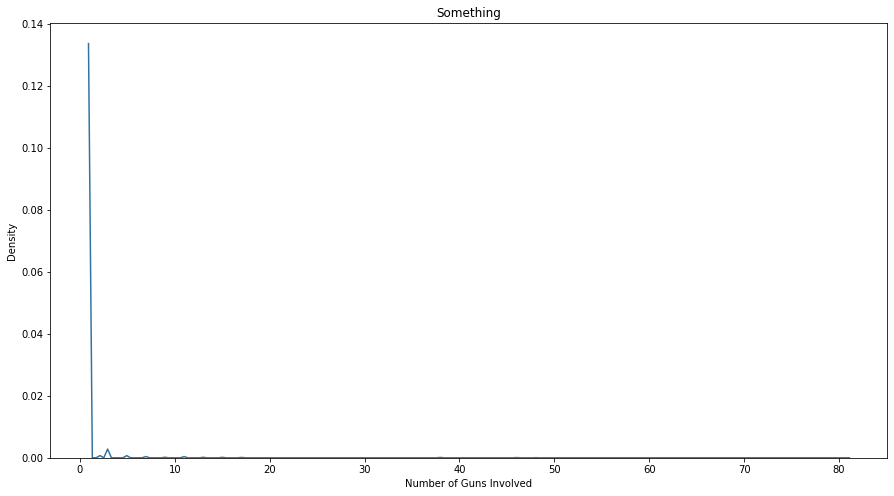

In [ ]:
sns.kdeplot(df_raw[df_raw['n_guns_involved'] > 0]['n_guns_involved'], bw_method = .05, color='#3174A1').set(title="Something", xlabel="Number of Guns Involved");

In [ ]:
dataFull[(dataFull['n_guns_involved'] > 5) & ((dataFull['n_killed'] > 0) | (dataFull['n_injured'] > 0))][['n_killed','n_injured','n_guns_involved','incident_url']]

,n_killed,n_injured,n_guns_involved,incident_url
4862,0,1,6.0,http://www.gunviolencearchive.org/incident/103049
28474,0,1,7.0,http://www.gunviolencearchive.org/incident/165701
38026,1,0,47.0,http://www.gunviolencearchive.org/incident/195244
48573,0,1,10.0,http://www.gunviolencearchive.org/incident/284730
50287,0,1,12.0,http://www.gunviolencearchive.org/incident/266143
...,...,...,...,...
226325,2,0,31.0,http://www.gunviolencearchive.org/incident/102...
227232,1,0,6.0,http://www.gunviolencearchive.org/incident/102...
231633,1,0,7.0,http://www.gunviolencearchive.org/incident/104...
236263,0,1,8.0,http://www.gunviolencearchive.org/incident/106...


In [ ]:
temp = dataFull['participant_type'][2]
print(temp)

0::Subject-Suspect||1::Subject-Suspect||2::Victim||3::Victim||4::Victim


In [ ]:
(df_raw['n_guns_involved'] > 2*df_raw['n_suspects']).sum()/df_raw.shape[0]

0.23479176908490765

In [ ]:
df_raw[(df_raw['n_guns_involved'] > 3*df_raw['n_suspects']) & (df_raw['n_guns_involved'] < 10) & (df_raw['n_guns_involved'] > 1) & (df_raw['n_suspects'] > 0) ]

,date,state,city_or_county,n_killed,n_injured,n_guns_involved,participant_type,moon_phase,n_suspects
4862,2014-02-02,California,Gardena,0,1,6.0,0::Subject-Suspect,Wane_Cres,1
41833,2014-10-15,Washington,Marysville,0,2,4.0,0::Victim||1::Subject-Suspect,Wane_Gib,1
43781,2014-10-27,New York,Bainbridge,1,1,4.0,0::Victim||1::Victim||2::Subject-Suspect,Wax_Cres,1
51173,2014-12-24,South Carolina,Anderson County,1,1,5.0,0::Victim||1::Victim||2::Subject-Suspect,New,1
51950,2014-12-30,New York,Danby,1,0,6.0,0::Subject-Suspect,First_Quar,1
...,...,...,...,...,...,...,...,...,...
232658,2018-02-14,Pennsylvania,Pittsburgh (Churchill),0,1,4.0,0::Subject-Suspect,Third_Quar,1
236263,2018-03-09,Wisconsin,Milwaukee (West Allis),0,1,8.0,0::Victim||1::Subject-Suspect,Third_Quar,1
236938,2018-03-14,Texas,San Antonio,1,0,4.0,0::Victim||1::Subject-Suspect,Wane_Cres,1
239154,2018-03-28,Arizona,Tucson,0,1,5.0,0::Subject-Suspect,Wax_Gib,1


In [ ]:
dataFull.iloc[43781]

incident_id                                                               212742
date                                                                  2014-10-27
state                                                                   New York
city_or_county                                                        Bainbridge
address                                                       2907 state Route 7
n_killed                                                                       1
n_injured                                                                      1
incident_url                   http://www.gunviolencearchive.org/incident/212742
source_url                     http://www.pressconnects.com/story/news/public...
incident_url_fields_missing                                                False
congressional_district                                                      22.0
gun_stolen                     0::Not-stolen||1::Not-stolen||2::Not-stolen||3...
gun_type                    

In [ ]:
(df_raw['n_suspects'] == 0).sum()

69403

In [ ]:
# Guns involved has a lot of nan values and is inconsistent including guns seized after the crime, wildly varied

In [ ]:
# Finding a meaningful way to remove incidents where the number of guns involved is inflated, as well as the discovery
# that the metric does not include police weapons involved make this metric hard to deal with
# for example two incidents can be reported with 1 gun invloved, but 1 was a man shooting at 1 officer
# and the other could be a man with a gun, in a standoff with 40 police officers.
# our attempt to filter the data failed as the perpetrator is not always listed as a participant in the data


Graphs

In [ ]:
data = dataFull[['date','state','n_killed', 'n_injured']].copy()

In [ ]:
data = data[(data['n_killed'] > 0) | (data['n_injured'] > 0)]
data['n_casualties'] = data['n_killed'] + data['n_injured']

In [ ]:
data['moon_phase'] = data['date'].apply(calcMoonPhase)
data['phase_num'] = data['date'].apply(calcMoonPhaseNum)
moon_phase_names = ['New','Wax_Cres','1st_Quar','Wax_Gib','Full','Wan_Gib', '3rd_Quar', 'Wan_Cres']


df_mass = data[ (data['n_killed'] >= 4) ].copy()
df_mass_cas = data[data['n_casualties'] >= 4 ].copy()

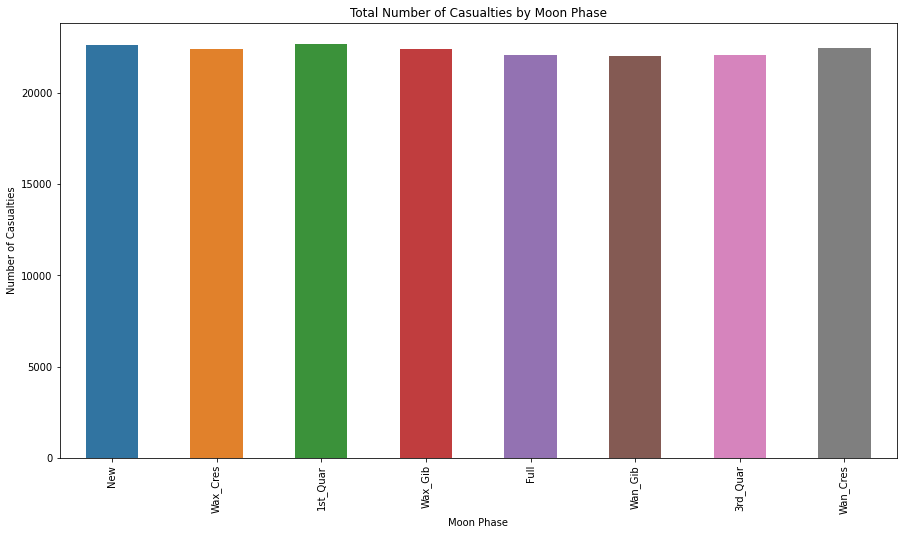

In [ ]:
data.groupby('phase_num')['n_casualties'].sum().plot(title='Total Number of Casualties by Moon Phase', xlabel='Moon Phase', ylabel='Number of Casualties', rot=90, kind='bar', color=color_theme).set_xticklabels(moon_phase_names);


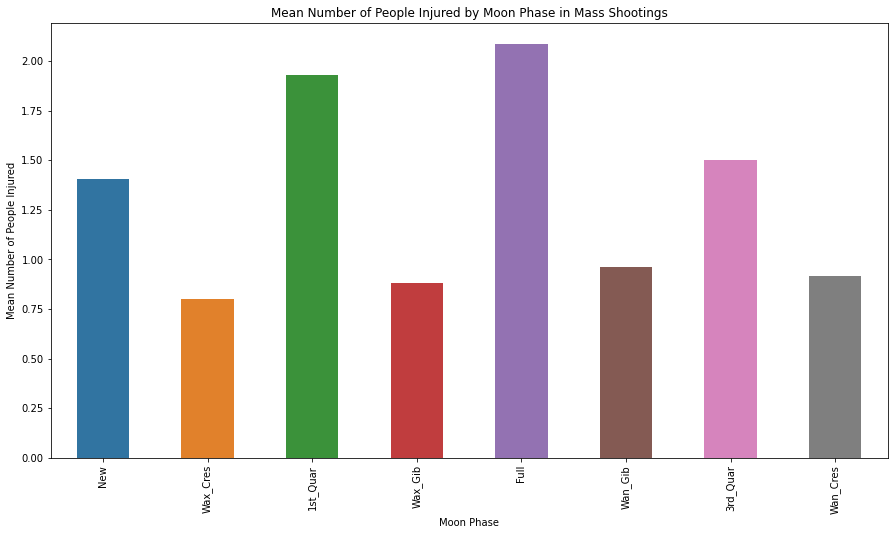

In [ ]:
 df_mass.groupby('phase_num')['n_injured'].mean().plot(title='Mean Number of People Injured by Moon Phase in Mass Shootings', xlabel='Moon Phase', ylabel='Mean Number of People Injured', rot=90, kind='bar', color=color_theme).set_xticklabels(moon_phase_names);
 

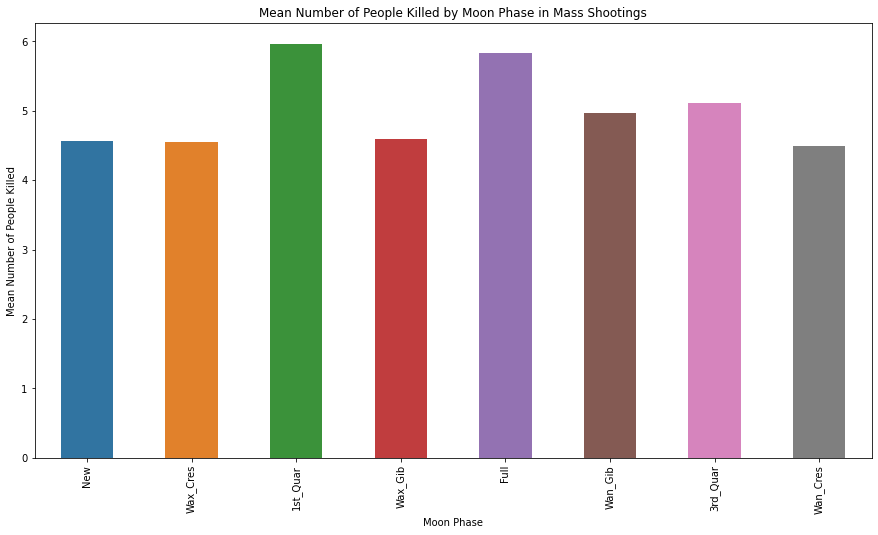

In [ ]:
df_mass.groupby('phase_num')['n_killed'].mean().plot(title="Mean Number of People Killed by Moon Phase in Mass Shootings", xlabel="Moon Phase", ylabel="Mean Number of People Killed", rot=90, kind="bar", color=color_theme).set_xticklabels(moon_phase_names);

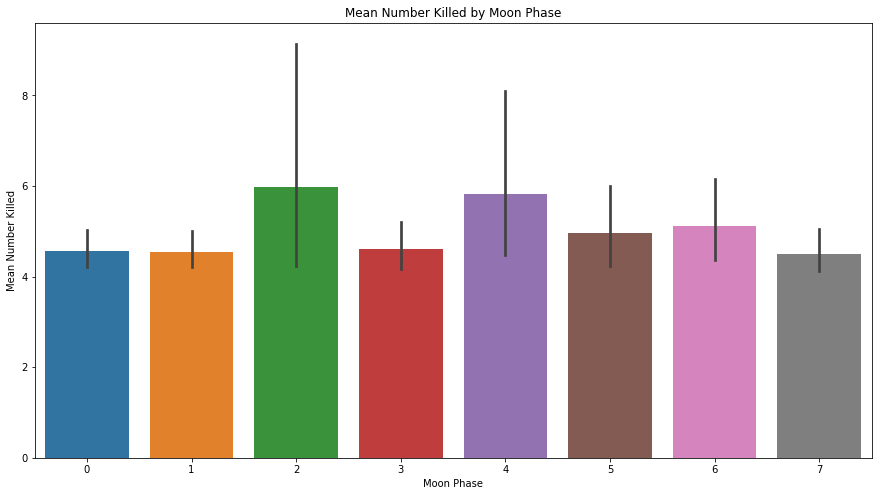

In [ ]:
plot = sns.barplot(x=df_mass['phase_num'], y=df['n_killed']).set(ylabel="Mean Number Killed", xlabel='Moon Phase', title='Mean Number Killed by Moon Phase');

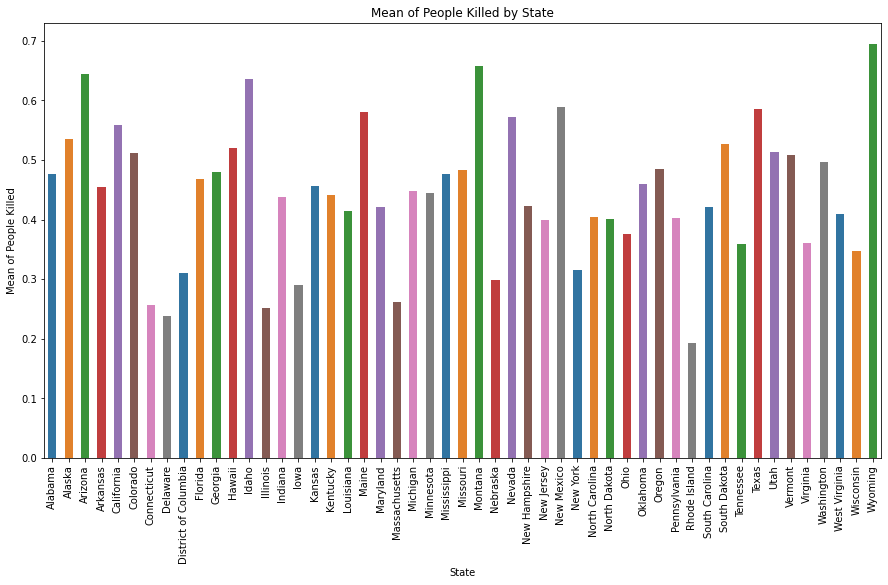

In [ ]:
data.groupby('state')['n_killed'].mean().plot.bar(color=color_theme, ylabel='Mean of People Killed', xlabel='State', title='Mean of People Killed by State', figsize=(15, 8));

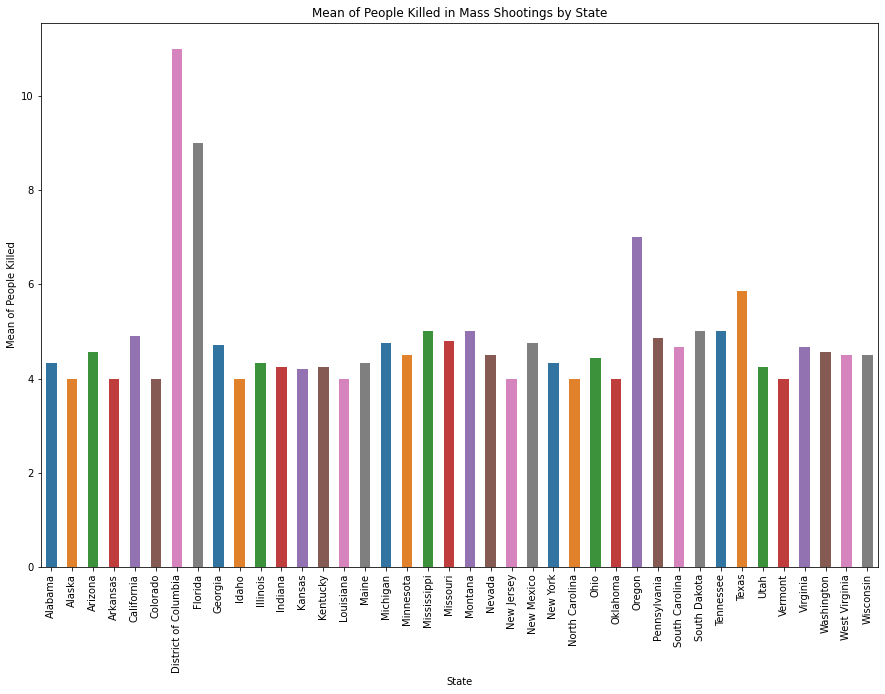

In [ ]:
df_mass.groupby('state')['n_killed'].mean().plot.bar(color=color_theme, title='Mean of People Killed in Mass Shootings by State', ylabel='Mean of People Killed', xlabel='State', figsize=(15, 10));

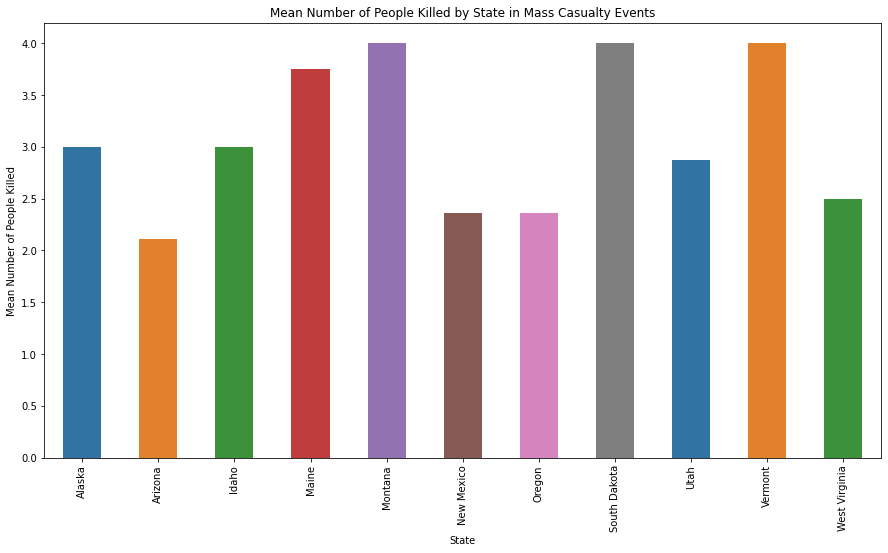

In [ ]:
df_mass_cas.groupby('state')['n_killed'].mean()[(df_mass_cas.groupby('state')['n_killed'].mean() > 2)].plot.bar(color=color_theme, xlabel='State', ylabel='Mean Number of People Killed', title='Mean Number of People Killed by State in Mass Casualty Events');

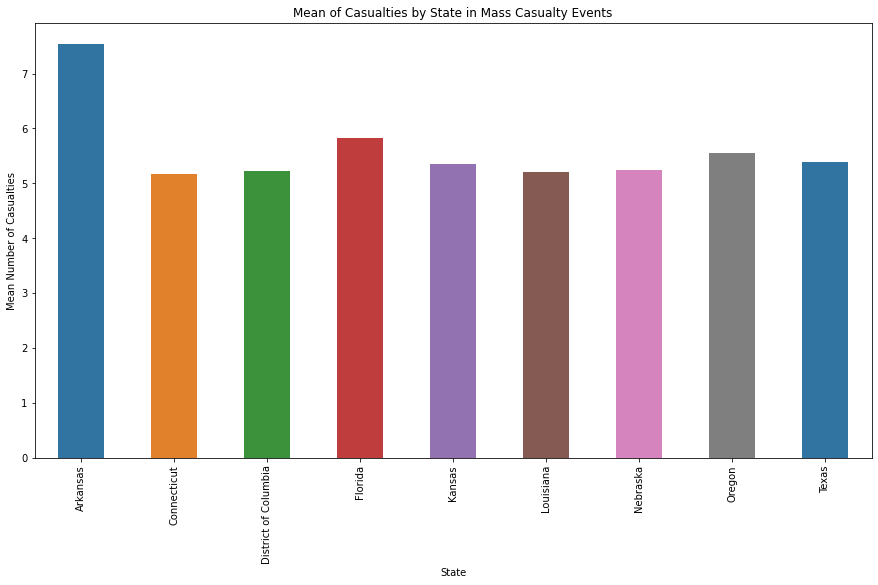

In [ ]:
df_mass_cas.groupby('state')['n_casualties'].mean()[(df_mass_cas.groupby('state')['n_casualties'].mean() > 5)].plot.bar(color=color_theme, xlabel='State', ylabel='Mean Number of Casualties', title='Mean of Casualties by State in Mass Casualty Events');

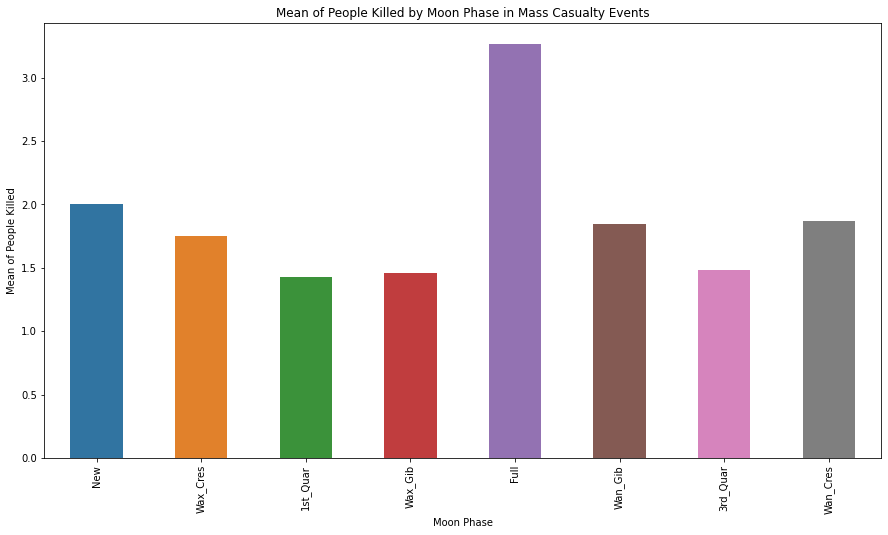

In [ ]:
df_mass_cas[df_mass_cas['state'] == 'Texas'].groupby('phase_num')['n_killed'].mean().plot(title="Mean of People Killed by Moon Phase in Mass Casualty Events", xlabel="Moon Phase", ylabel="Mean of People Killed", rot=90, kind="bar", color=color_theme).set_xticklabels(moon_phase_names);

ML Section
We will primarily focus on using the n_killed and n_injured and the state to predict the moon_phase
We will also be using engineer features, such as one hot encoded state values, number of casualties.
There may be some other derivable features from these values and guns_involved may or may not make the final cut.

In [ ]:
data = dataFull[['date','state','n_killed', 'n_injured']].copy()

In [ ]:
data = data[(data['n_killed'] > 0) | (data['n_injured'] > 0)]

In [ ]:
data['moon_phase'] = data['date'].apply(calcMoonPhase)
data['phase_num'] = data['date'].apply(calcMoonPhaseNum)
data['phase_angle'] = data['date'].apply(calcMoonAngle)
data['n_casualties'] = data['n_killed'] + data['n_injured']
data['perc_killed'] = data['n_killed'] / data['n_casualties']
data['perc_injured'] = data['n_injured'] / data['n_casualties']
data['sin_angle'] = (2*math.pi*data['phase_angle']/moon_cycle).apply(math.sin)
data['cos_angle'] = (2*math.pi*data['phase_angle']/moon_cycle).apply(math.cos)

In [ ]:
#one hot encode
states = data['state'].unique()

for s in enumerate(states):
    name = 'is' + s[1]
    data[name] = 1*(data['state'] == s[1])

In [ ]:

df_mass = data[ (data['n_killed'] >= 4) ].copy()
df_mass_cas = data[ data['n_casualties'] >= 4 ].copy()

In [ ]:
X = data[['n_killed','n_injured']].values
y = data[['moon_phase','phase_num']]
#We will use the phase number to determine the baseline, as it is a numerical representation of the phases

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#lets establisha baseline for this set
base_num = y_train['phase_num'].mean()
blind_guess = moon_phase_names[round(base_num)%8]
baseline_accuracy = (y_test['moon_phase'] == blind_guess).mean()
print(blind_guess, ' guessed for an accuracy of: ' , baseline_accuracy)
y_train.drop('phase_num', axis = 1, inplace = True)
y_test.drop('phase_num', axis = 1, inplace = True)
y_train = y_train.values
y_test = y_test.values

Wax_Gib  guessed for an accuracy of:  0.12421284266217197


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_test)
(predictions == y_test).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.12543359216613104

In [ ]:
X = data.drop(['moon_phase','phase_num','phase_angle', 'sin_angle','cos_angle','date','state'], axis = 1).values
y = data[['moon_phase','phase_num']]
#We will use the phase number to determine the baseline, as it is a numerical representation of the phases

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#lets establisha baseline for this set
base_num = y_train['phase_num'].mean()
blind_guess = moon_phase_names[round(base_num)%8]
baseline_accuracy = (y_test['moon_phase'] == blind_guess).mean()
print(blind_guess, ' guessed for an accuracy of: ' , baseline_accuracy)
y_train.drop('phase_num', axis = 1, inplace = True)
y_test.drop('phase_num', axis = 1, inplace = True)
y_train = y_train.values
y_test = y_test.values

Wax_Gib  guessed for an accuracy of:  0.12421284266217197


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_test)
(predictions == y_test).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.12476343937721272

In [ ]:
def computeRMSE(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [ ]:
X = data.drop(['moon_phase','phase_num', 'phase_angle' ,'sin_angle','cos_angle','date','state'], axis = 1).values
y = data['phase_angle'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#lets establish a baseline for this set
blind_guess = y_train.mean()
baseline = computeRMSE(blind_guess,y_test)
print(blind_guess, ' guessed for an rmse of: ' , baseline)

14.731221092974025  guessed for an rmse of:  8.574175409155602


In [ ]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_test)
rmse = computeRMSE(predictions, y_test)
print(rmse)

9.987527759664985


In [ ]:
X = data.drop(['date','state','n_killed','n_injured','n_casualties','perc_injured','perc_killed','moon_phase'], axis = 1).values
y = data['n_casualties'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#lets establish a baseline for this set
blind_guess = y_train.mean()
baseline = computeRMSE(blind_guess,y_test)
print(blind_guess, ' guessed for an rmse of: ' , baseline)

1.2583648530695375  guessed for an rmse of:  0.685172588438916


In [ ]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_test)
rmse = computeRMSE(predictions, y_test)
print(rmse)

0.7459225806271945


In [ ]:
X = data[['phase_num','sin_angle','cos_angle','phase_angle']].values
y = data['n_casualties'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#lets establish a baseline for this set
blind_guess = y_train.mean()
baseline = computeRMSE(blind_guess,y_test)
print(blind_guess, ' guessed for an rmse of: ' , baseline)

1.2583648530695375  guessed for an rmse of:  0.685172588438916


In [ ]:
KNN = KNeighborsRegressor(n_neighbors=500, weights='distance', metric ='manhattan')
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_test)
rmse = computeRMSE(predictions, y_test)
print(rmse)

0.6861232980640662
